In [ ]:
import pandas as pd
from hiti_preproc.dicoms import preprocess_pixel_array, 
import pydicom
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt

In [3]:
# load environment variables
load_dotenv()

# load EMBED image metadata to sample an example image
meta_path: str = os.environ["METADATA_PATH"]
meta_df = pd.read_csv(meta_path)


/tmp/ipykernel_117099/1827453952.py:6: DtypeWarning: Columns (0,2,3,4,41,43,64,68,71,74,82,89,91,101,103,104,106,108,110,111,112,113,114,115,116,117,118,128,130,131,132,133,134,136,141,145,146,147,148,153,158,159) have mixed types. Specify dtype option on import or set low_memory=False.
  meta_df = pd.read_csv(meta_path)


In [4]:
# get a dataset of 2D mammograms from cohorts 1/2 (available in EMBED Open Data) 
# and exclude spot compression/magnification images
test_df = meta_df[
    (meta_df.FinalImageType == "2D")
    & (meta_df.cohort_num.isin([1.0, 2.0]))
    & (meta_df.spot_mag != 1)
]

print(f"Unique DICOMs: {test_df.anon_dicom_path.nunique():,d}")

Unique DICOMs: 334,885


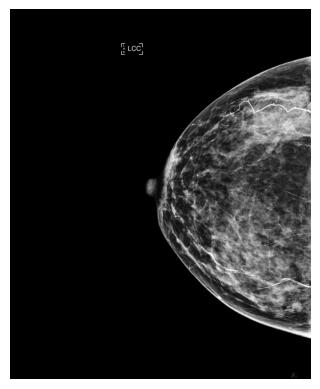

In [8]:
# randomly sample an image
test_row = test_df.sample(1).iloc[0]

# load the dicom
dicom: pydicom.FileDataset = pydicom.dcmread(test_row.anon_dicom_path)

# display the raw image
plt.imshow(dicom.pixel_array, cmap="gray")
plt.axis("off")
plt.show()